In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sms-spam-collection-dataset/spam.csv


**Importing the data **

In [2]:
data= pd.read_csv('../input/sms-spam-collection-dataset/spam.csv',encoding='ISO-8859-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

We can see that there are there unnecessary columns in the data set.We can drop the unwanted columns 

In [5]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Lets change the names of columns for convienence

In [7]:
data.rename({'v1': 'labels', 'v2': 'messages'}, axis=1, inplace=True)

In [8]:
data.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data.describe()

,labels,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
labels      5572 non-null object
messages    5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
data.groupby('labels').describe().T

labels                              ham  \
messages count                     4825   
         unique                    4516   
         top     Sorry, I'll call later   
         freq                        30   

labels                                                        spam  
messages count                                                 747  
         unique                                                653  
         top     Please call our customer service representativ...  
         freq                                                    4

In [12]:
data.isnull().sum()

labels      0
messages    0
dtype: int64

In [13]:
len(data)

5572

In [14]:
data['length']=data['messages'].apply(len)

In [15]:
data.head()

,labels,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
data['labels'].unique()

array(['ham', 'spam'], dtype=object)

In [17]:
data['labels'].value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

**Plotting the histogram of Labels **

In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns
#plt.style.use('fivethirtyeight')

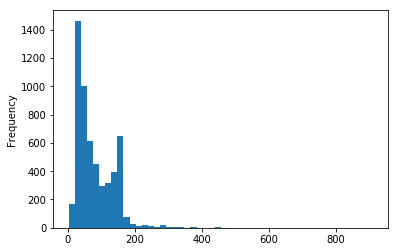

In [19]:
data['length'].plot(bins=50,kind='hist')
plt.ioff()

/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'h' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'm' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


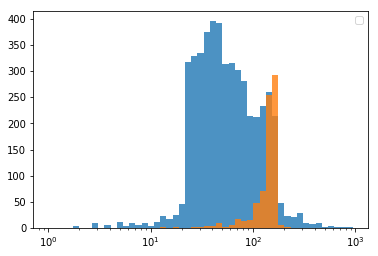

In [20]:
plt.xscale('log')
bins=1.15**(np.arange(0,50))
plt.hist(data[data['labels']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(data[data['labels']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend('ham','spam')
plt.show()

Spam text messages are longer than ham text messages 

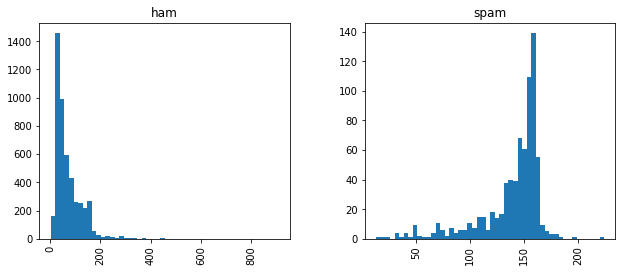

In [21]:
data.hist(column='length',by='labels',bins=50,figsize=(10,4))
plt.ioff()

**Lets print out longest message**

In [22]:
data['length'].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [23]:
data[data['length']==910]['messages'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

**Email Classification based on length of Mail**

In [24]:
from sklearn.model_selection import train_test_split

**Creating the matrix features and target **

In [25]:
X=data['length'].values[:,None]
#X=data['length'].values
y=data['labels']

**Splitting the data **

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [27]:
X_train.shape

(3900, 1)

In [28]:
#y_test

**Using Logistic Regression**

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr_model=LogisticRegression(solver='lbfgs')

In [31]:
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
from sklearn import metrics

In [33]:
predictions=lr_model.predict(X_test)

In [34]:
predictions

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [35]:
#y_test

In [36]:
print(metrics.confusion_matrix(y_test,predictions))

[[1414   39]
 [ 218    1]]


In [37]:
df=pd.DataFrame(metrics.confusion_matrix(y_test,predictions),index=['ham','spam'],columns=['ham','spam'])
df

,ham,spam
ham,1414,39
spam,218,1


In [38]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.92      1453
        spam       0.03      0.00      0.01       219

    accuracy                           0.85      1672
   macro avg       0.45      0.49      0.46      1672
weighted avg       0.76      0.85      0.80      1672



In [39]:
print(metrics.accuracy_score(y_test,predictions))

0.8462918660287081


**Using Naive Bayes **

In [40]:
from sklearn.naive_bayes import MultinomialNB
nb_model=MultinomialNB()
nb_model.fit(X_train,y_train)
predictions=nb_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1453    0]
 [ 219    0]]


In [41]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      1.00      0.93      1453
        spam       0.00      0.00      0.00       219

    accuracy                           0.87      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.76      0.87      0.81      1672



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Lets try Support Vector Machine **

In [42]:
from sklearn.svm import SVC
svc_model=SVC(gamma='auto')
svc_model.fit(X_train,y_train)
predictions=svc_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1356   97]
 [ 112  107]]


In [43]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.92      0.93      0.93      1453
        spam       0.52      0.49      0.51       219

    accuracy                           0.88      1672
   macro avg       0.72      0.71      0.72      1672
weighted avg       0.87      0.88      0.87      1672



**Extracting the features from text **

In [44]:
data.head()

,labels,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


#### Check for missing values 

In [45]:
data.isnull().sum()

labels      0
messages    0
length      0
dtype: int64

In [46]:
data['labels'].value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X=data['messages']

In [49]:
y=data['labels']

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [51]:
from sklearn.feature_extraction.text import CountVectorizer 

In [52]:
count_vect=CountVectorizer()

In [53]:
# FIT Vectorizer to the data (build a vocab,count the number of words)
#count_vect.fit(X_train)
# Transform the original text to message --> Vector 
#X_train_counts=count_vect.transform(X_train)

X_train_counts=count_vect.fit_transform(X_train) # One step Fit and Transform

In [54]:
X_train_counts

<3733x7057 sparse matrix of type '<class 'numpy.int64'>'
	with 49296 stored elements in Compressed Sparse Row format>

In [55]:
X_train.shape

(3733,)

In [56]:
X_train_counts.shape

(3733, 7057)

In [57]:
from sklearn.feature_extraction.text import TfidfTransformer 

In [58]:
tfidf_transformer=TfidfTransformer()

In [59]:
X_train_tfidf=tfidf_transformer.fit_transform(X_train_counts)

In [60]:
X_train_tfidf.shape

(3733, 7057)

**Combining the Count Vectorization and Tdidf Transformation **

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer 

In [62]:
vectorizer=TfidfVectorizer()

In [63]:
X_train_tfidf=vectorizer.fit_transform(X_train)

**Training a classifier **

In [64]:
from sklearn.svm import LinearSVC

In [65]:
clf=LinearSVC()

In [66]:
clf.fit(X_train_tfidf,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

**Creating a single pipeline tfidf,Vectorizer and Classification**

In [67]:
from sklearn.pipeline import Pipeline

In [68]:
text_clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])

In [69]:
text_clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

In [70]:
predictions=text_clf.predict(X_test)

![](http://)**Confusion Matrix & CLassification report**

In [71]:
from sklearn.metrics import confusion_matrix,classification_report

In [72]:
print(confusion_matrix(y_test,predictions))

[[1581    6]
 [  27  225]]


In [73]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1587
        spam       0.97      0.89      0.93       252

    accuracy                           0.98      1839
   macro avg       0.98      0.94      0.96      1839
weighted avg       0.98      0.98      0.98      1839



**Accuracy **

In [74]:
from sklearn import metrics 

In [75]:
metrics.accuracy_score(y_test,predictions)

0.9820554649265906

**Predicting on new dataset **

In [76]:
text_clf.predict(["Hi how are you doing today"])

array(['ham'], dtype=object)

In [77]:
text_clf.predict(["COngraluations you are lucky winner of bummer prize money"])

array(['spam'], dtype=object)